forecasting 
- cash 
- sales 
- weather 
- churn 
- disease
- analysing survay data
- stock market prediction 
- cgpa prediction
- analysis of relationship bw variables
- Iceram vs temperature
- engine failiur / predictive maintainance


In [1]:
import shap
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


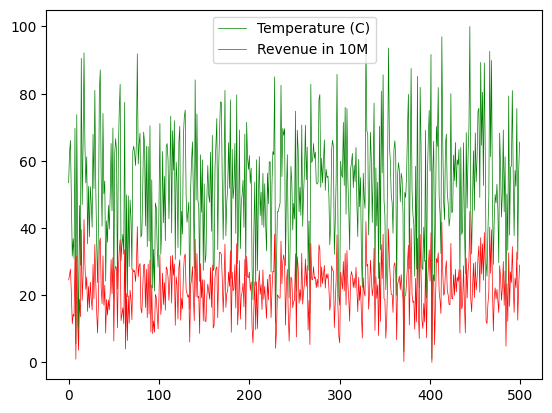

In [20]:
df = pd.read_csv("./datasets/IceCreamData.csv")
plt.figure(1)
plt.plot(df['Revenue']/10,color='g',linewidth=0.5)
plt.plot(df['Temperature'],color='red',linewidth=0.5)
plt.legend(["Temperature (C)", "Revenue in 10M"])

In [3]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
x_train, x_test, y_train, y_test= train_test_split(df['Temperature'],df['Revenue'],test_size=0.2)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [5]:
def abline(slope, intercept, x , y):
    """Plot a line from slope and intercept"""
    x_vals = np.linspace(min(x)-10,max(x)+10,30)
    y_vals = intercept + slope * x_vals
    plt.subplot()
    color = np.random.rand(100)
    plt.plot(x_vals, y_vals,color='r')
    plt.scatter(x,y,s=30,c=color,alpha=0.6)
    plt.show()

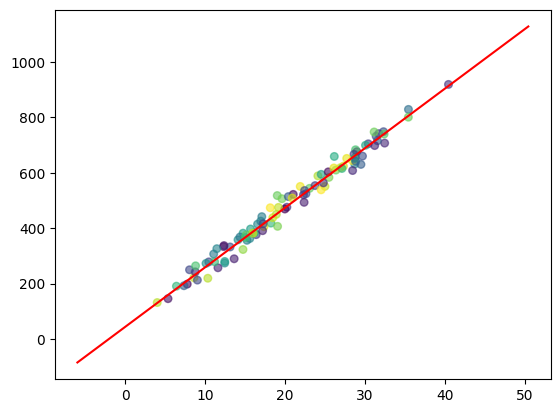

In [6]:
c,m=[model.intercept_[0],model.coef_[0][0]]
abline(m,c,x_test,y_test)

In [7]:
score = model.score(x_test.values.reshape(-1, 1),y_test.values.reshape(-1,1))
print(score)

0.9823782737085158


In [8]:
explainer = shap.Explainer(model.predict, x_test.values.reshape(-1,1))
shap_values = explainer( x_test.values.reshape(-1,1))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


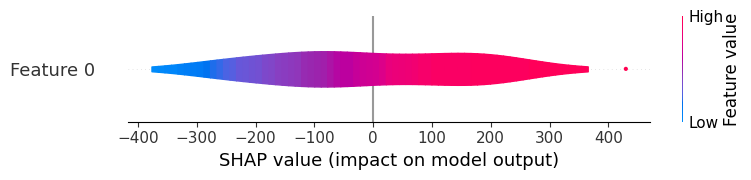

In [9]:
shap.summary_plot(shap_values,plot_type='violin')